# Importing the libraries

In [6]:
import requests # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content
import re

In [7]:
# creating the empty list
ipad_reviews = []

In [10]:
#getting reviews through web scraping
for i in range (1,20):
    ipad = []
    url = 'https://www.amazon.in/product-reviews/B09G9CVML5/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&filterByStar=all_stars&reviewerType=avp_only_reviews&pageNumber=1&sortBy=helpful#reviews-filter-bar'
    response = requests.get(url)
    soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content
    reviews = soup.find_all('div', class_='a-section review aok-relative')
    for i in range (len(reviews)):
        ipad.append(reviews[i].text)
        ipad_reviews = ipad_reviews + ipad # adding the reviews of one page to empty list which in future contains all the reviews

In [12]:
# writng reviews in a text file 
with open("ipad.txt","w",encoding='utf8') as output:
    output.write(str(ipad_reviews))

In [13]:
 # Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ipad_reviews)

In [14]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [15]:
import nltk
from nltk.corpus import stopwords

In [18]:
# words that contained in ipad reviews
ip_reviews_words = ip_rev_string.split(" ")

In [20]:
print(ip_reviews_words)

['suman', 'out', 'of', 'stars', 'best', 'tablet', 'for', 'students', 'reviewed', 'in', 'india', 'on', 'may', 'verified', 'purchase', 'if', 'u', 'are', 'thinking', 'of', 'buying', 'a', 'tablet', 'for', 'studying', 'under', 'k', 'segment', 'this', 'the', 'tablet', 'to', 'go', 'for', 'although', 'the', 'display', 'is', 'non', 'laminated', 'it', 'doesn', 't', 'affect', 'the', 'quality', 'of', 'the', 'display', 'neither', 'it', 'degrades', 'the', 'sharpness', 'of', 'it', 'the', 'only', 'problem', 'due', 'to', 'this', 'may', 'arise', 'only', 'for', 'artists', 'who', 'want', 'to', 'draw', 'or', 'paint', 'in', 'ipad', 'the', 'true', 'tone', 'feature', 'is', 'really', 'useful', 'for', 'reading', 'texts', 'as', 'it', 'automatically', 'adjusts', 'screen', 'colour', 'according', 'to', 'the', 'surrounding', 'light', 'availability', 'battery', 'life', 'is', 'just', 'excellent', 'i', 'do', 'not', 'play', 'games', 'and', 'the', 'screen', 'on', 'time', 'is', 'almost', 'hours', 'with', 'standby', 'of', 

In [21]:
stop_words = stopwords.words('english')

In [24]:
with open("C:\Excelr assignments\Assignment 11 Text mining\stop.txt") as sw:
    stopwords = sw.read()

In [25]:
stopwords = stopwords.split("\n")

In [26]:
ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [27]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

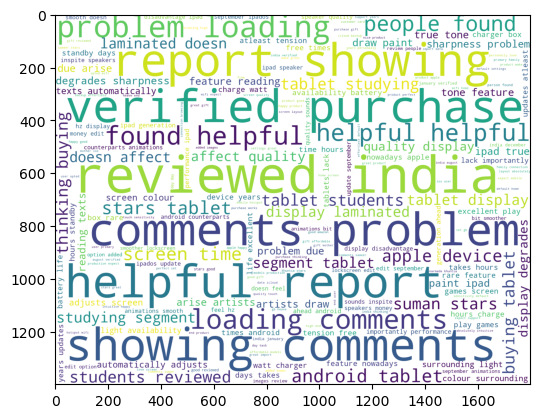

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud


wordcloud_ip = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)

In [38]:
# positive words # Choose the path for +ve words stored in system
with open("C:\Excelr assignments\Assignment 11 Text mining\positive-words.txt") as pos:
    poswords = pos.read().split("\n")
  
poswords = poswords[36:]


In [35]:
# negative words  Choose path for -ve words stored in system
with open(r"C:\Excelr assignments\Assignment 11 Text mining\negative-words.txt") as neg:
    negwords = neg.read().split("\n")

negwords = negwords[37:]

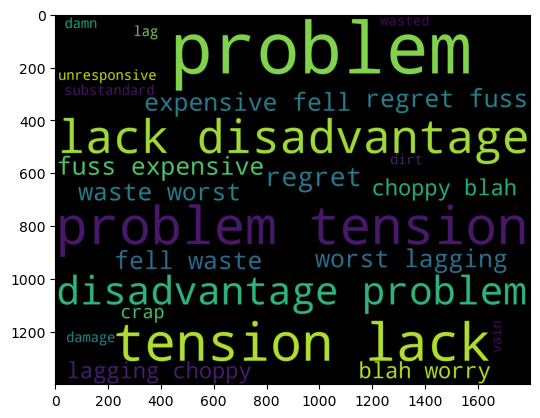

In [39]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)

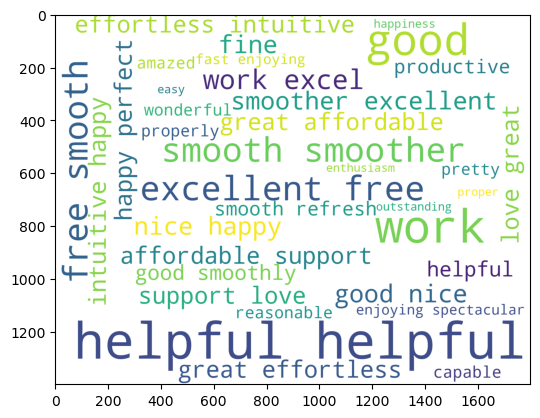

In [41]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)

plt.imshow(wordcloud_pos_in_pos)
